In [1]:
from qa_qc_lib.qa_qc_seismic import QA_QC_seismic

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length):
    if num_sides < 3:
        raise ValueError("A polygon must have at least 3 sides.")

    # Generate random side lengths
    side_lengths = np.random.uniform(min_side_length, max_side_length, num_sides)

    # Calculate the total perimeter of the polygon
    total_perimeter = np.sum(side_lengths)

    # Calculate the angles between the sides
    angles = np.random.uniform(0, 360, num_sides)

    # Generate the cumulative angles for vertex positions
    cumulative_angles = np.cumsum(angles)

    # Generate the coordinates of the polygon vertices
    x_coords = total_perimeter * np.cos(np.radians(cumulative_angles))
    y_coords = total_perimeter * np.sin(np.radians(cumulative_angles))

    # Close the polygon
    x_coords = np.append(x_coords, x_coords[0])
    y_coords = np.append(y_coords, y_coords[0])

    # Check if any of the sides intersect, and if so, regenerate the polygon
    for i in range(num_sides):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % num_sides], y_coords[(i + 1) % num_sides]
        for j in range(i + 2, num_sides):
            x3, y3 = x_coords[j], y_coords[j]
            x4, y4 = x_coords[(j + 1) % num_sides], y_coords[(j + 1) % num_sides]
            if do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
                return generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

    return x_coords, y_coords

def do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    # Check if two line segments intersect using the cross product method
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1

    d1 = cross_product(x4 - x3, y4 - y3, x1 - x3, y1 - y3)
    d2 = cross_product(x4 - x3, y4 - y3, x2 - x3, y2 - y3)
    d3 = cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    d4 = cross_product(x2 - x1, y2 - y1, x4 - x1, y4 - y1)

    if (d1 * d2 < 0) and (d3 * d4 < 0):
        return True
    return False


def add_noise_to_polygon(polygon_points, noise_factor=0.1):
    x_coords, y_coords = zip(*polygon_points)
    noise_x = np.random.uniform(-noise_factor, noise_factor, len(x_coords))
    noise_y = np.random.uniform(-noise_factor, noise_factor, len(y_coords))

    x_coords_noisy = [x + noise for x, noise in zip(x_coords, noise_x)]
    y_coords_noisy = [y + noise for y, noise in zip(y_coords, noise_y)]

    return list(zip(x_coords_noisy, y_coords_noisy))
    

def build_polygon_from_points(x_coords, y_coords):
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    rectangle_points = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_points

In [3]:
file_path = 'data/seismic_data/Глубинный куб NP cropped'
#file_path = 'data/seismic_data/Временной куб NP cropped'

# Example usage:
num_sides = 5
min_side_length = 1
max_side_length = 5
x_coords, y_coords = generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

license_area_poly = list(zip(x_coords*5000, y_coords*500))
license_area_poly

[(-26632.03063985539, -5457.235537063624),
 (-57935.95601734407, 1818.878849889623),
 (60523.38663809593, 493.2210108740092),
 (60253.433457292704, -754.5249055452487),
 (59931.20896544649, -978.0450840385306),
 (-26632.03063985539, -5457.235537063624)]

In [4]:
file_path = 'data/seismic_data/Временной куб NP cropped'
surfaces_path_list = ['data/seismic_data/TWT_NP4', 'data/seismic_data/TWT_NP5', 'data/seismic_data/NP4_TVD_TOP', 'data/seismic_data/NP4_TWT_TOP']

seism_data_qa_qc = QA_QC_seismic(file_path=file_path,
                                 surfaces_path_list=surfaces_path_list,
                                 faults_file_path='data/seismic_data/Faults TVD'
                                 )
                                 

In [6]:
seism_data_qa_qc.license_area_poly = add_noise_to_polygon(build_polygon_from_points(seism_data_qa_qc.coordinate_x, seism_data_qa_qc.coordinate_y), noise_factor=10000)
#seism_data_qa_qc.license_area_poly = None
#seism_data_qa_qc.license_area_poly = license_area_poly

In [5]:
test_names = seism_data_qa_qc.get_list_of_tests()
test_names

['test_coordinate_validation',
 'test_edge_zone_evaluation',
 'test_faults_location_validation',
 'test_miss_traces',
 'test_monotony',
 'test_surfaces_dept_validation',
 'test_surfaces_location_validation',
 'test_surfaces_values_validation']

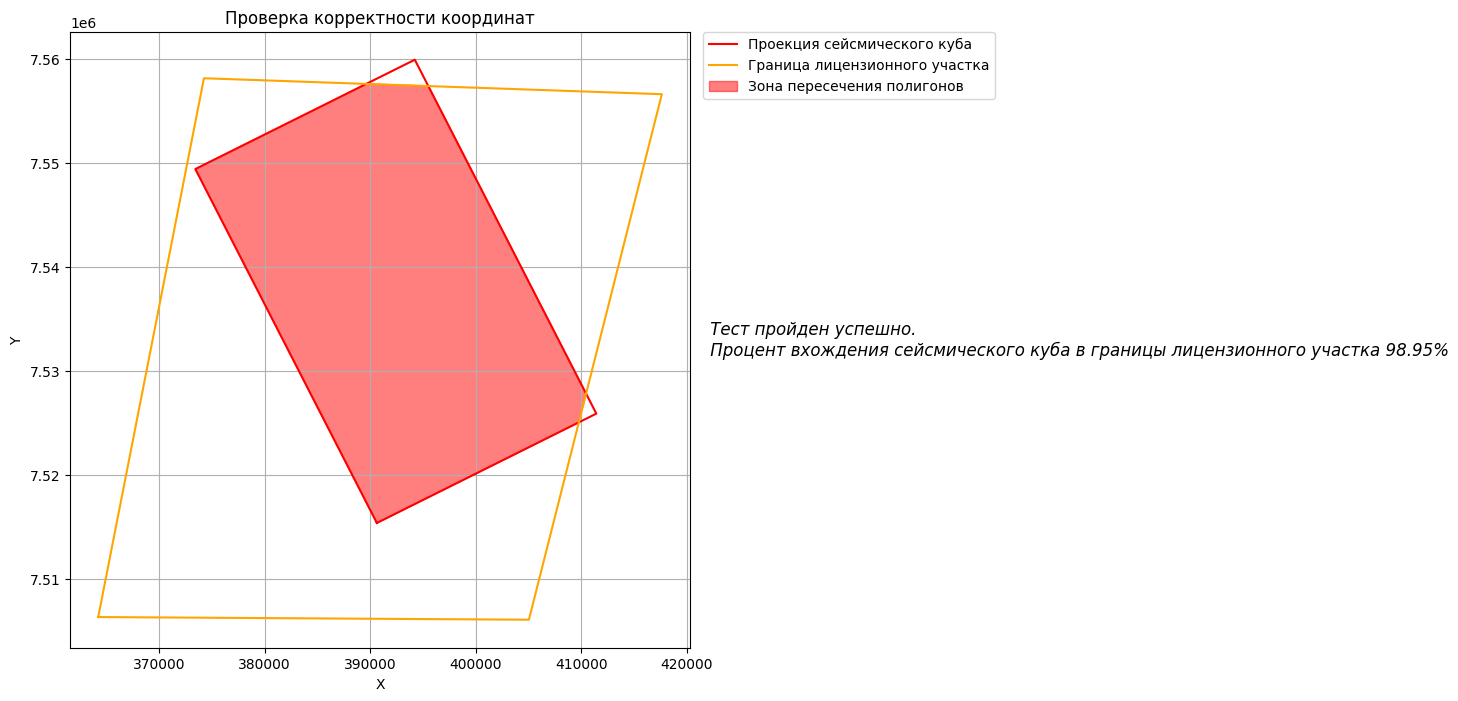


------------------------------------------------------------------------------------


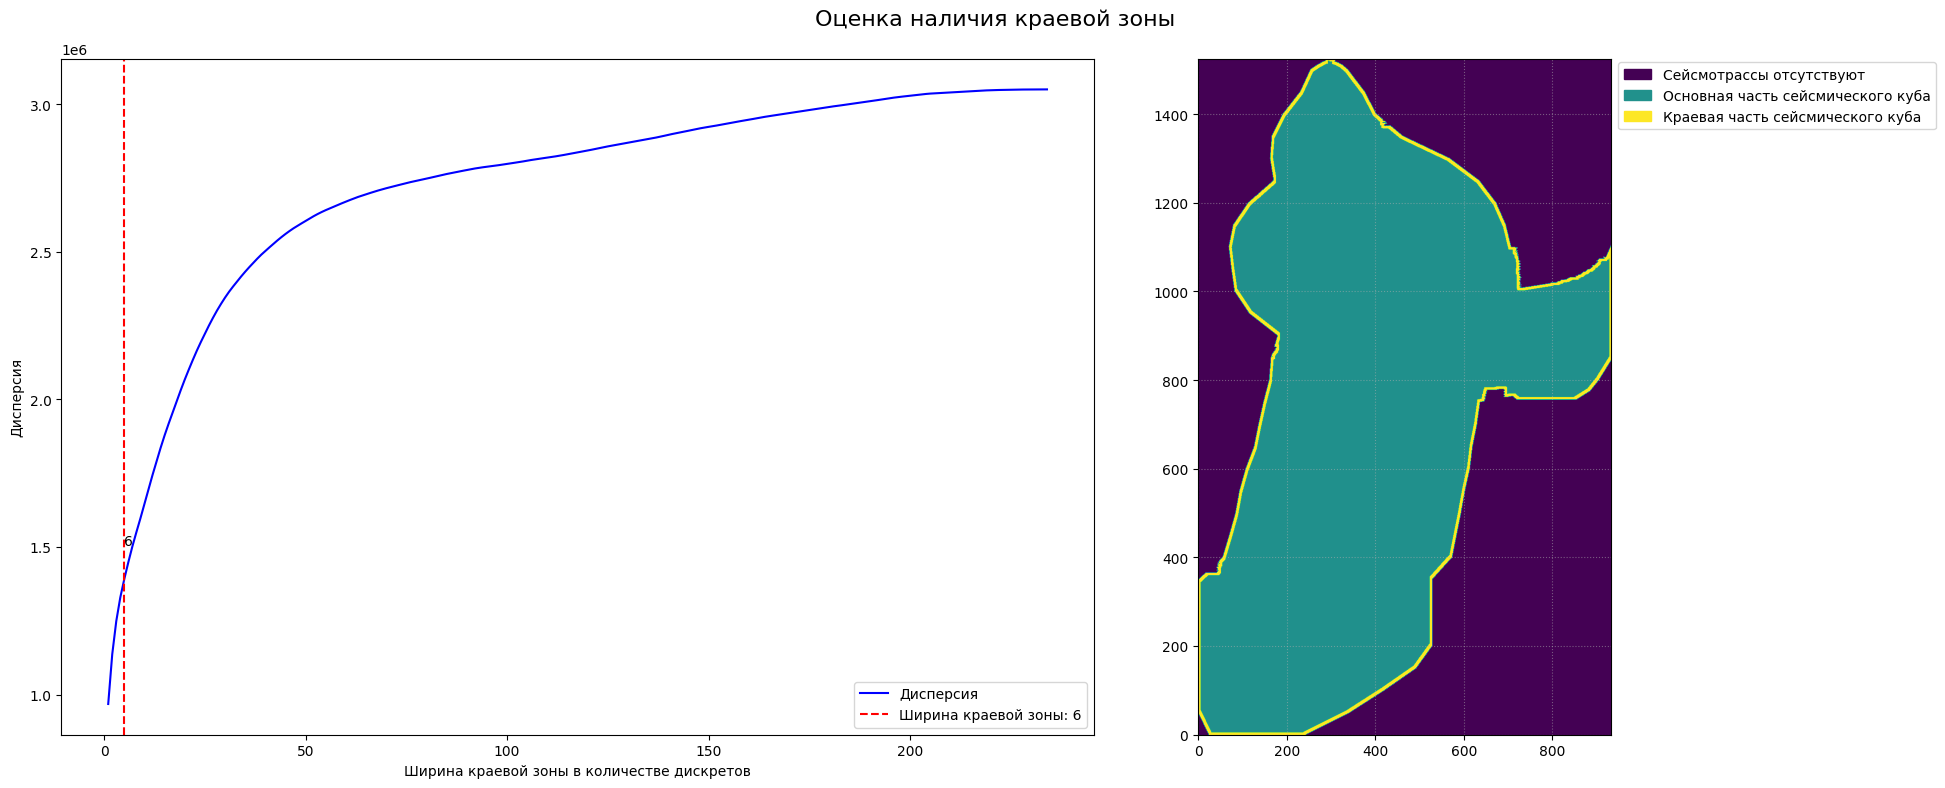


------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 0.0% точек разлома из 19 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 0.0% точек разлома из 20 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 0.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 0.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_k

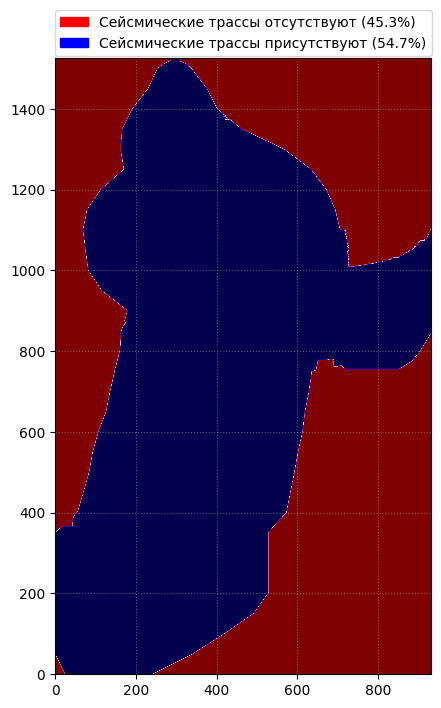


------------------------------------------------------------------------------------

     Тест пройден успешно. 
     Отметки оси глубин/времени монотонно возрастают
------------------------------------------------------------------------------------

     Тест не пройден. 
     Нижележащая структурная карта "TWT_NP5" оказалась выше вышележащей структурной карты "TWT_NP4" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест пройден успешно. 
     Нижележащая структурная карта "NP4_TVD_TOP" оказалась ниже вышележащей структурной карты "TWT_NP5"
------------------------------------------------------------------------------------

     Тест не пройден. 
     Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест пройден успешно.
   

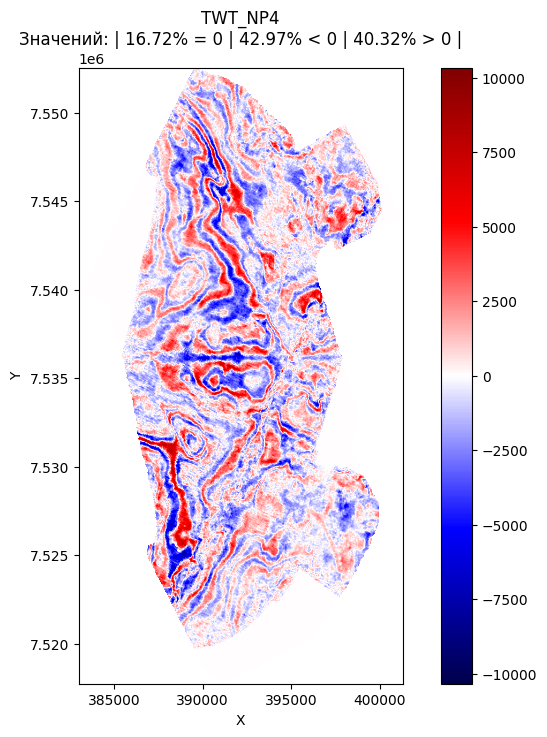


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!


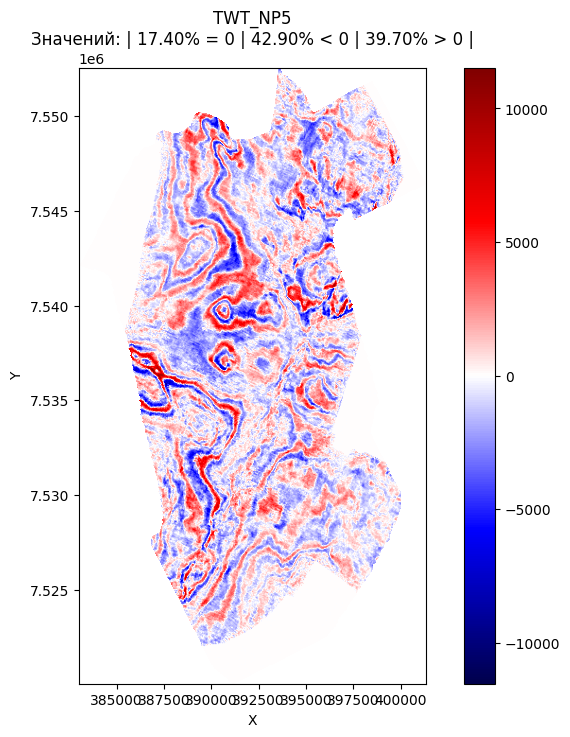


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP";отражающий горизонт NP4_TVD_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP";отражающий горизонт NP4_TWT_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------


In [7]:
result = seism_data_qa_qc.start_tests(test_names)

Оценивает вхождение сейсмического куба в полигон лицензионного участка

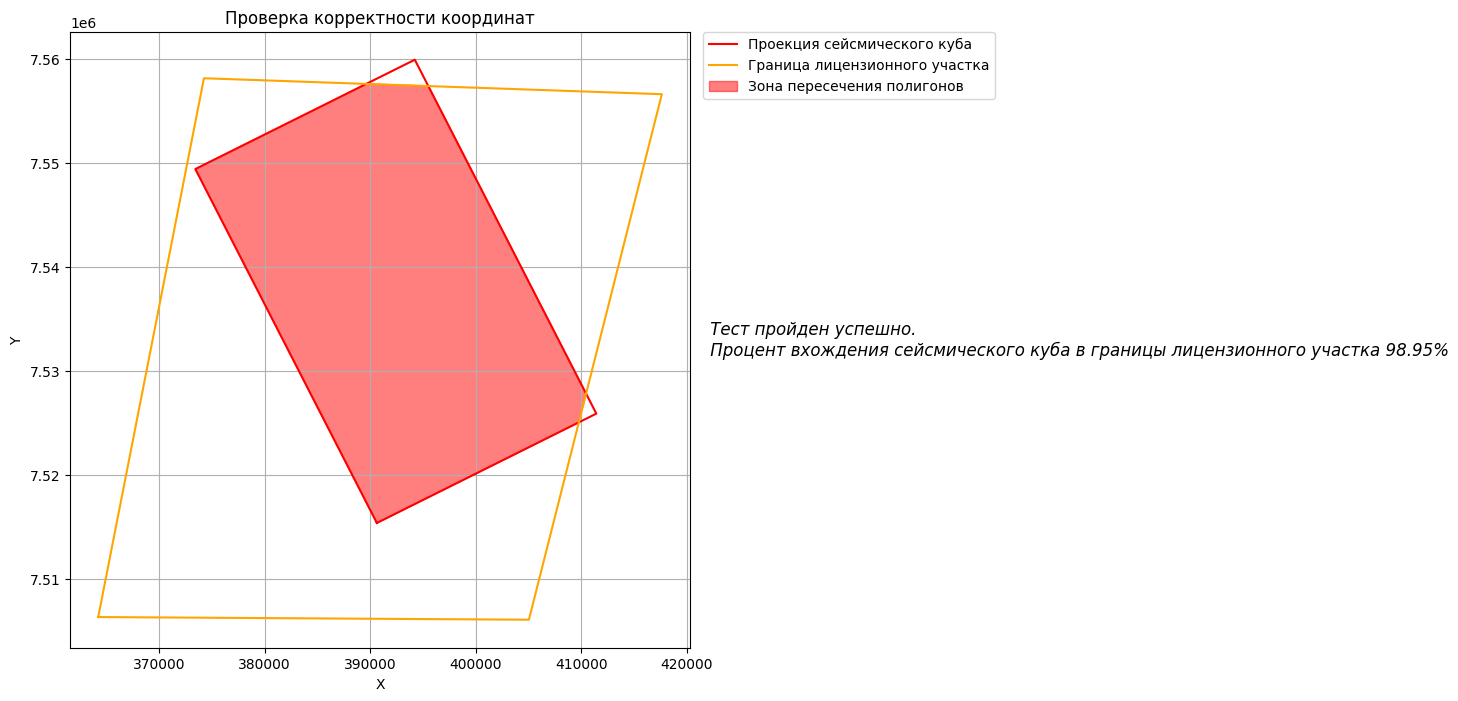


------------------------------------------------------------------------------------


{'result': 'True',
 'file_name': 'Временной куб NP cropped',
 'date': '2023-09-07 17:33:47'}

In [21]:
seism_data_qa_qc.test_coordinate_validation()

Выявление границы краевой зоны

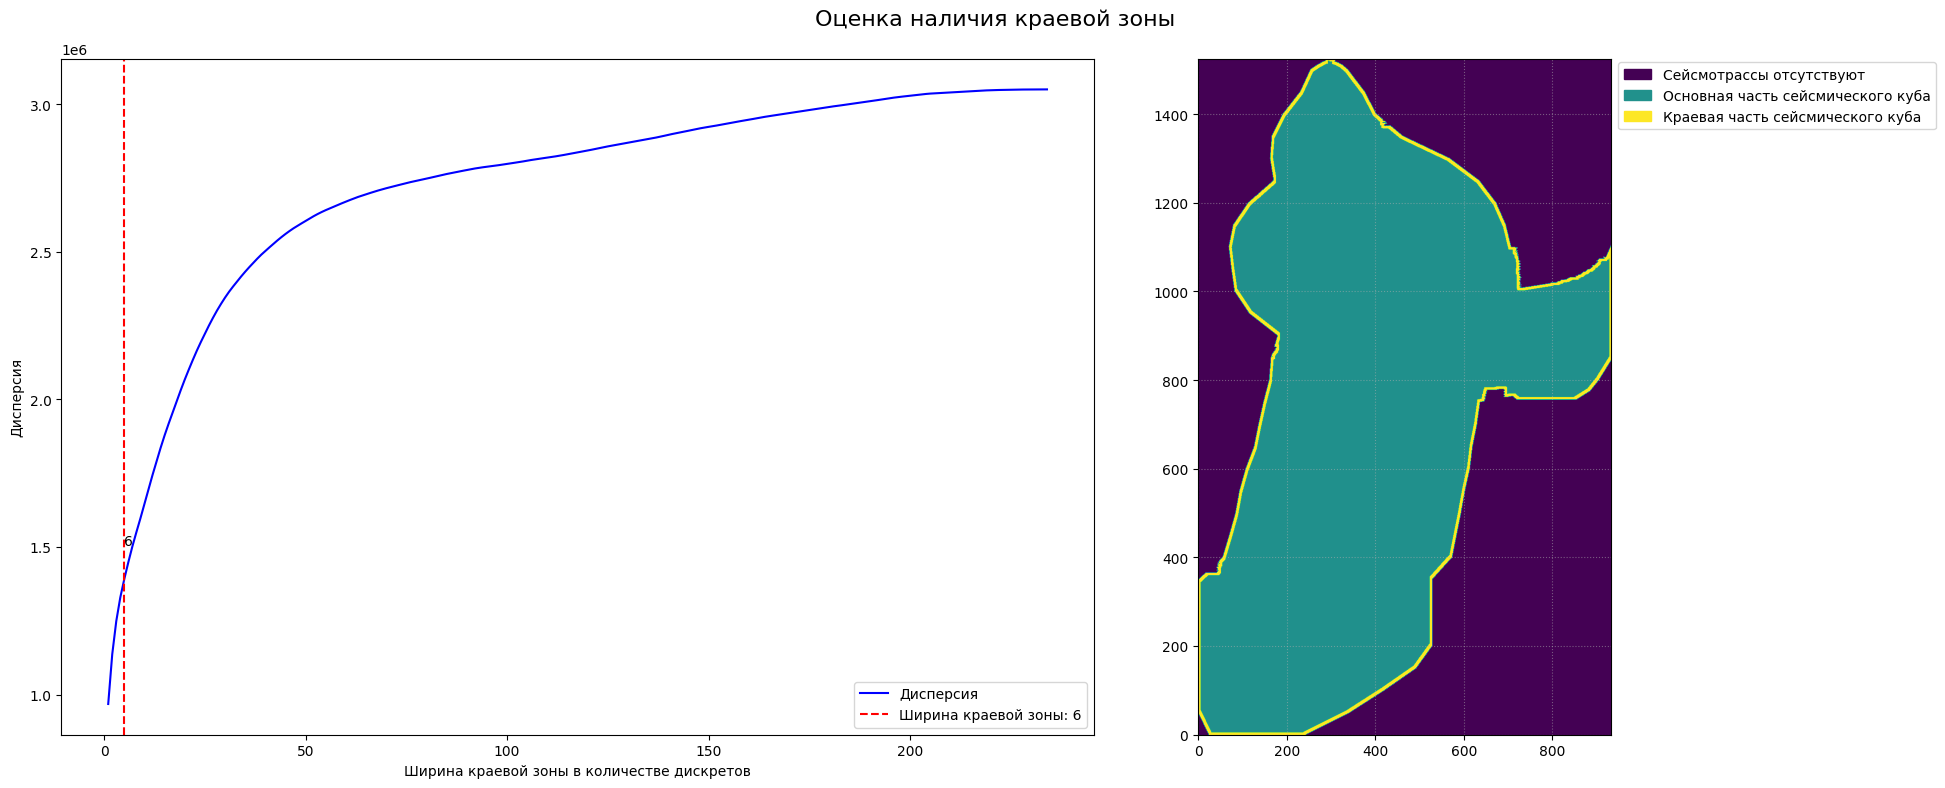


------------------------------------------------------------------------------------


{'variance_list': [968121.3,
  1136706.4,
  1248859.2,
  1329078.4,
  1391949.0,
  1448637.5,
  1501948.6,
  1550399.9,
  1597219.8,
  1646500.6,
  1695386.5,
  1743837.0,
  1790297.6,
  1835450.4,
  1878041.0,
  1917707.2,
  1955843.1,
  1994064.5,
  2031050.9,
  2066939.1,
  2100768.5,
  2133464.2,
  2164907.0,
  2194322.8,
  2222426.2,
  2249925.5,
  2275988.2,
  2300620.2,
  2323290.8,
  2344601.2,
  2364309.8,
  2382231.8,
  2399283.2,
  2416161.8,
  2432190.0,
  2447454.5,
  2462026.0,
  2476424.5,
  2489989.0,
  2502484.8,
  2514535.5,
  2526587.5,
  2538230.2,
  2549423.0,
  2560029.8,
  2569974.0,
  2579294.8,
  2587865.0,
  2596066.8,
  2604288.8,
  2612413.5,
  2620314.0,
  2627681.2,
  2634479.8,
  2640807.2,
  2646682.8,
  2652407.8,
  2658226.5,
  2664031.2,
  2669634.5,
  2675036.8,
  2680317.5,
  2685372.5,
  2689944.5,
  2694370.2,
  2698788.5,
  2703088.5,
  2707246.8,
  2711160.0,
  2714877.5,
  2718463.0,
  2721929.0,
  2725364.2,
  2728801.2,
  2732254.5,
  2735567

In [13]:
seism_data_qa_qc.test_edge_zone_evaluation()

Проверка положения плоскости разлома на глубинном сейсмическом кубе

In [14]:
seism_data_qa_qc.test_faults_location_validation()


     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_2_[Depth_1]"; 0.0% точек разлома из 19 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_4_[Depth_1]"; 0.0% точек разлома из 20 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_5_[Depth_1]"; 0.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_6_[Depth_1]"; 0.0% точек разлома из 16 входит в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Разлом:"Fault_Ok_Jra_kust14_7_[Depth_1]"; 0.0% точек разлома из 11 входит в границы сейсмического куба
-----

{'data availability': True,
 'Fault_Ok_Jra_kust14_2_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_4_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_5_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_6_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_7_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_8_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_Jra_kust14_9_[Depth_1]': {'income_points_percent': 0.0},
 'Fault_Ok_NP_Jra_kust11_10_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_11_[Depth_1]': {'income_points_percent': 38.89},
 'Fault_Ok_NP_Jra_kust11_14_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_15_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_1_[Depth_1]': {'income_points_percent': 15.0},
 'Fault_Ok_NP_Jra_kust11_2_[Depth_1]': {'income_points_percent': 50.0},
 'Fault_Ok_NP_Jra_kust11_3_[Depth_1]': {'income_points_perc

Проверка положения структурной карты на глубинном сейсмическом кубе

In [15]:
seism_data_qa_qc.test_surfaces_location_validation()


     Тест пройден успешно.
     Путь к файлу:"data/seismic_data/TWT_NP4"; отражающий горизонт попадает в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест пройден успешно.
     Путь к файлу:"data/seismic_data/TWT_NP5"; отражающий горизонт попадает в границы сейсмического куба
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)
------------------------------------------------------------------------------------

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP"; отражающий горизонт не попадает в границы сейсмического куба (совпадение по X,Y:True, по вертикальной шкале:False)
------------------------------------------------------------------------------------


{'data availability': True,
 'TWT_NP4': {'x_y_coords_validation': 'True', 'z_coords_validation': 'True'},
 'TWT_NP5': {'x_y_coords_validation': 'True', 'z_coords_validation': 'True'},
 'NP4_TVD_TOP': {'x_y_coords_validation': 'True',
  'z_coords_validation': 'False'},
 'NP4_TWT_TOP': {'x_y_coords_validation': 'True',
  'z_coords_validation': 'False'},
 'date': '2023-09-07 15:09:26'}

Проверка физичности значений амплитуд на сейсмическом кубе. 

Абсолютно все значения амплитуд по всей сейсмотрассе = 0

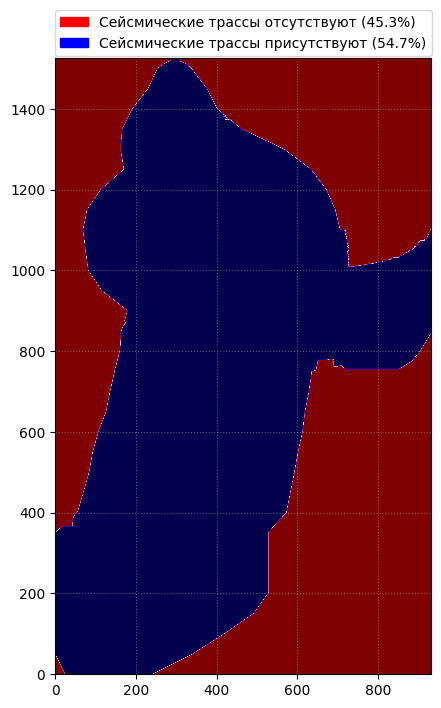


------------------------------------------------------------------------------------


{'result': False,
 'wrong_values': array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 'file_name': 'Временной куб NP cropped',
 'date': '2023-09-07 15:09:27'}

In [16]:
seism_data_qa_qc.test_miss_traces()

Проверка физичности значений времени/глубины на сейсмическом кубе, проверяет на монотонное возрастание по всей оси.

In [17]:
seism_data_qa_qc.test_monotony()


     Тест пройден успешно. 
     Отметки оси глубин/времени монотонно возрастают
------------------------------------------------------------------------------------


{'result': True,
 'wrong_values': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  

Проверка корректности пикировки отражающего горизонта. 

Отражающий горизонт пересекает сейсмический куб в значениях амплитуд разного знака. Нет значительного преобладания амплитуд одного знака

ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!


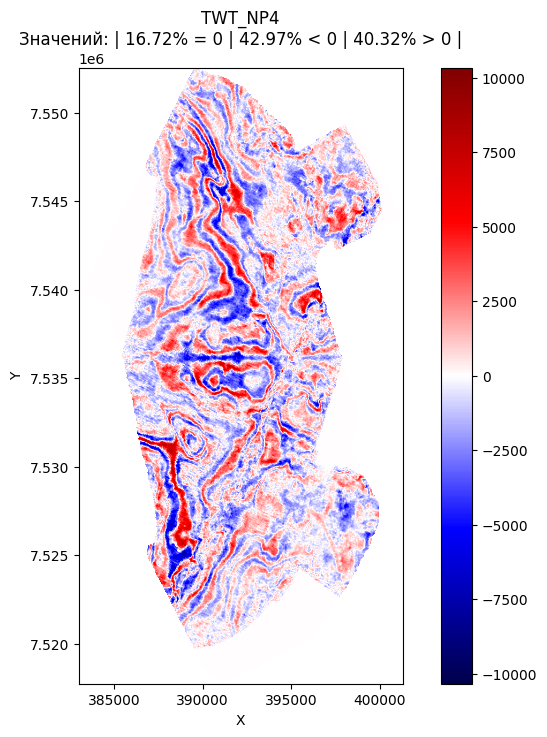


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!


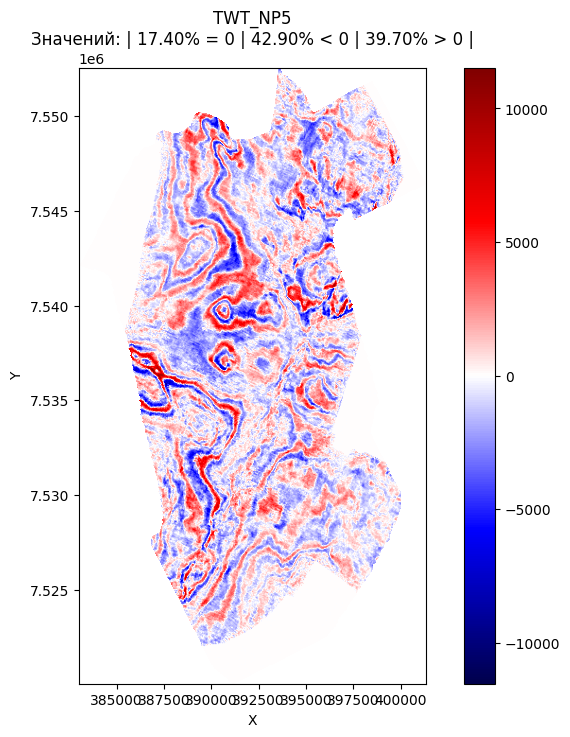


------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TVD_TOP";отражающий горизонт NP4_TVD_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------
ВНИМАНИЕ! Часть точек поверхности выходит за пределы сейсмического куба по X, Y!
ВНИМАНИЕ! Найдены точки вне заданного диапазона глубины!

     Тест не пройден.
     Путь к файлу:"data/seismic_data/NP4_TWT_TOP";отражающий горизонт NP4_TWT_TOP не попадает в границы сейсмического куба
------------------------------------------------------------------------------------


{'data availability': True,
 'TWT_NP4': {'result': False,
  'slise_map':                X          Y         Dept        Value
  1134    391050.0  7552550.0  1489.899780     0.000000
  1135    391100.0  7552550.0  1489.523071     0.000000
  1136    391150.0  7552550.0  1488.851074     0.000000
  1137    391200.0  7552550.0  1487.968872     0.000000
  1138    391250.0  7552550.0  1487.149292     0.000000
  ...          ...        ...          ...          ...
  311774  389800.0  7517800.0  1586.040405  -295.462860
  311775  389850.0  7517800.0  1585.729980  -147.731430
  312214  389450.0  7517750.0  1583.604004  1034.119995
  312218  389650.0  7517750.0  1586.825073  -590.925720
  312219  389700.0  7517750.0  1587.080444  -295.462860
  
  [152873 rows x 4 columns]},
 'TWT_NP5': {'result': False,
  'slise_map':                X          Y         Dept        Value
  1134    391050.0  7552550.0  1502.826172     0.000000
  1135    391100.0  7552550.0  1503.068848     0.000000
  1136    391

In [18]:
seism_data_qa_qc.test_surfaces_values_validation()

Проверка на пересечение поверхностей кровли и подошвы

In [19]:
seism_data_qa_qc.test_surfaces_dept_validation()


     Тест не пройден. 
     Нижележащая структурная карта "TWT_NP5" оказалась выше вышележащей структурной карты "TWT_NP4" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------

     Тест пройден успешно. 
     Нижележащая структурная карта "NP4_TVD_TOP" оказалась ниже вышележащей структурной карты "TWT_NP5"
------------------------------------------------------------------------------------

     Тест не пройден. 
     Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)
------------------------------------------------------------------------------------


{'data availability': True,
 'TWT_NP4': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'TWT_NP5': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'NP4_TVD_TOP': {'result': False,
  'result report': 'Нижележащая структурная карта "NP4_TWT_TOP" оказалась выше вышележащей структурной карты "NP4_TVD_TOP" (несоответствие на 100.00% площади)'},
 'files not found': [],
 'date': '2023-09-07 15:10:24'}

Формирование отчета в виде текстового файла

In [20]:
seism_data_qa_qc.generate_test_report(file_name='test_report_seismic')